In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

In [4]:
class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True,
                                           n_jobs=1)

SyntaxError: invalid syntax (<ipython-input-4-db33ec5a98f3>, line 1)

In [6]:
#boston 데이터 세트 로드
boston=load_boston()

In [7]:
#boston 데이터 세트 DataFrame 변환
bostonDF= pd.DataFrame(boston.data, columns= boston.feature_names)

In [8]:
#boston 데이터 세트의 target 배열은 주택 가격임. 이를 price 칼럼으로 DataFrame에 추가함.
bostonDF['price']=boston.target
print('Boston 데이터 세트 크기: ', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기:  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


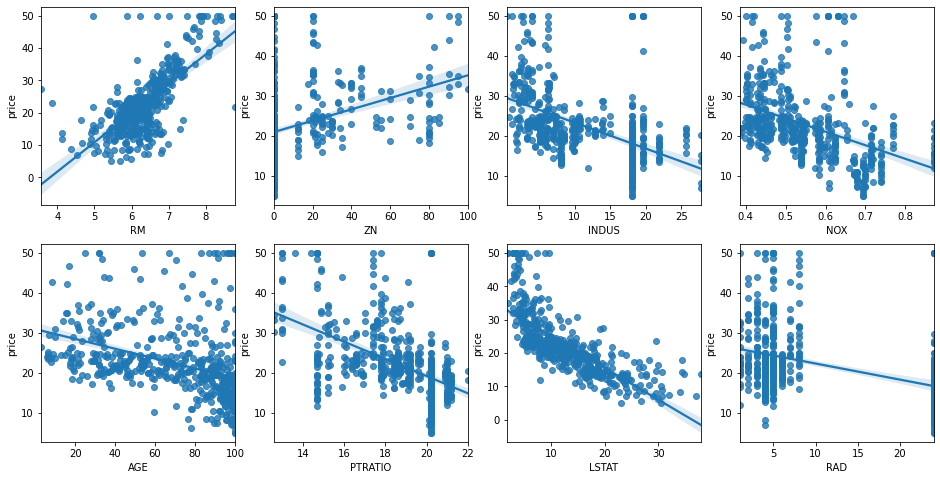

In [11]:
#2개의 행과 4개의 열을 가진 subplots을 이용. axs는 axㄹㄹ 가짐.
fig, axs= plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row=int(i/4)
    col=i%4
    #시본의 regplot을 이용해 산점도와 선형회귀 직선을 함께 표현
    sns.regplot(x=feature, y='price', data=bostonDF, ax=axs[row][col])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
y_target=bostonDF['price']
X_data=bostonDF.drop(['price'],axis=1, inplace=False)

X_train, X_test, y_train, y_test=train_test_split(X_data, y_target, test_size=0.3, random_state=156)

In [19]:
#선형 회귀 OLS로 학습/예측/평가 수행
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

In [21]:
print('MSE : {0:3f}, RMSE:{1:.3f}'.format(mse, rmse))
print('Variance score :{0:3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.296916, RMSE:4.159
Variance score :0.757226


In [24]:
print('절편값:', lr.intercept_)
print('회귀계수값:', np.round(lr.coef_,1))

절편값: 40.995595172164585
회귀계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [25]:
#회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff=pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [26]:
from sklearn.model_selection import cross_val_score

y_target=bostonDF['price']
X_data=bostonDF.drop(['price'],axis=1, inplace=False)
lr=LinearRegression()


In [28]:
#cross_val_score()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE구함
neg_mse_scores=cross_val_score(lr,X_data,y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

In [35]:
#cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print('5folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores,2))
print('5folds의 개별 RMSEscores: ', np.round(rmse_scores,2))
print('5folds의 평균 RMSE: {0:3f} ', format(avg_rmse))

5folds의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5folds의 개별 RMSEscores:  [3.53 5.1  5.75 8.99 5.77]
5folds의 평균 RMSE: {0:3f}  5.828658946215841
